## Python Example

In [ ]:
from utils.dataframes import *

meter_usage

## SQL Example

In [ ]:
from utils.runtime import connect_to_db

electric_brew = connect_to_db()

electric_brew.execute("SELECT * FROM meter_usage").fetchdf()

In [ ]:
electric_brew.close()

In [1]:
from utils.dataframes import *

print(dim_meters)

   id    meter_id  service_point_id account_number                    street  \
0   1  L108605388        2300822246    30010320353       115 FOX ST UNIT 115   
1   2  L108558642        2300822209    30010320361       115 FOX ST UNIT 103   
2   3  L108557737        2300910019    30010601281         111 FOX ST UNIT 2   
3   4  L108124433        2300920052    30010894035        115 FOX ST HSE MTR   
4   5  L127317092        2301030232    30010894035        115 FOX ST HSE MTR   
5   6  L108123969        2300588819    35012787137      1 INDUSTRIAL WAY U/6   
6   7  L123057647        2300588853    35012787756   1 INDUSTRIAL WAY UNIT 8   
7   8  L108607371        2300588897    35012790198  1 INDUSTRIAL WAY UNIT 10   

            label            operational_area  
0      Fox Street  Boiler Pump/Patio/Forklift  
1      Fox Street                    Brewpump  
2      Fox Street              Front of House  
3      Fox Street           Package/Hot/Chill  
4      Fox Street           Package/Hot

## Advanced Analysis
This section contains our project plan and temporary analysis cells. Our goal will be to migrate each of these cells into individual scripts, addressable through Make.

#### Project Plan

1. **Initial Data Exploration and Feature Selection**
   - Perform EDA on `fct_electric_brew`, `dim_datetimes`, `dim_bills`, focusing on `supplier`, `kwh`, `total_cost`, `hour`, `period`, and `month_name`. Explore trends and correlations, especially seasonal and hourly variations in `kwh` and `total_cost`.

   - **Target Variable:** Adopt `kwh_at_cost` as the primary metric (calculated as `kwh / total_cost`).
   - **Progression Logic:** EDA findings, especially on supplier impact, seasonal, and hourly variations, will guide feature engineering. The identified patterns will be critical for setting up the linear regression model.
   - **Packages:** Primarily `pandas` for data manipulation, `matplotlib.pyplot` and `seaborn` for visualizations.
   - **Visualization Techniques:** Use scatter plots, heatmaps, and seaborn's pairplot for exploring relationships and trends.
<br>

2. **Categorical Feature Engineering**
   - Quantify categorical variables like `supplier` from `dim_bills` and `period`, `month_name` from `dim_datetimes`. This will include one-hot encoding to capture their impacts on energy cost efficiency.
  
   - **Progression Logic:** Enhanced features, particularly from `dim_bills` and `dim_datetimes`, will be crucial in the linear regression model, offering a quantified view of how different time periods and suppliers influence `kwh_at_cost`.
   - **Packages:** Utilize `sklearn.preprocessing.OneHotEncoder` for encoding categorical variables.
   - **Visualization Techniques:** Bar plots to compare the impact of different categories post-encoding.
<br>

3. **Feature Pipelines**
   - Establish pipelines for data normalization (e.g., scaling `kwh` and `total_cost`) and encoding categorical features (`supplier`, `period`). Ensure consistency in data preparation for modeling.
  
   - **Progression Logic:** The feature pipeline will directly feed into the linear regression model, providing a standardized set of features for initial modeling and subsequent complex models.
   - **Packages:** Use `sklearn.pipeline.Pipeline` and `sklearn.compose.ColumnTransformer` for consistent data preprocessing.
   - **Visualization Techniques:** Box plots to visualize feature distributions post-normalization.
<br>

4. **Linear Regression with Initial Features**
   - Construct a linear regression model using variables like `supplier`, `hour`, `kwh`, and `period` to predict `kwh_at_cost`. This model will provide a baseline understanding of the relationships in the data.
  
   - **Progression Logic:** The linear regression model’s performance and insights, particularly regarding supplier impact and time-related features, will inform the need for and approach to polynomial modeling and decision trees.
   - **Packages:** `sklearn.linear_model.LinearRegression` for the regression analysis.
   - **Visualization Techniques:** Regression plots using seaborn to visualize actual vs. predicted values.
<br>

5. **Polynomial Basis Functions and Regularization**
   - Explore polynomial features to model complex non-linear trends, such as the interaction between `hour` and `kwh`. Apply regularization (e.g., Ridge or Lasso) to avoid overfitting.
  
   - **Progression Logic:** Insights from linear regression on key interactions will guide the use of polynomial features, preparing for a more nuanced understanding in tree-based models.
   - **Packages:** `sklearn.preprocessing.PolynomialFeatures` for polynomial transformation, and `sklearn.linear_model.Ridge` or `Lasso` for regularization.
   - **Visualization Techniques:** Residual plots to evaluate the fit and seaborn's regplot to visualize polynomial regressions.
<br>

6. **Decision Trees and Random Forests**
    - Develop decision tree and random forest models using refined features, focusing on capturing complex interactions and nonlinear relationships, such as the influence of specific `suppliers` and `meter_id` on `kwh_at_cost`.
  
    - **Progression Logic:** These models will build on the polynomial regression findings to provide a deeper understanding of feature interactions, setting the stage for cross-validation and anomaly detection.
    - **Packages:** `sklearn.tree.DecisionTreeRegressor` and `sklearn.ensemble.RandomForestRegressor` for tree-based models.
    - **Visualization Techniques:** Feature importance plots using matplotlib to understand predictive variables.
<br>

7. **Model Validation via Cross-Validation**
   - Perform cross-validation on the developed models to assess their performance stability across different temporal segments, evaluating how different suppliers, hours, and seasons affect predictions.
  
   - **Progression Logic:** Cross-validation findings will highlight model robustness and guide fine-tuning, particularly for models like random forests, which are prone to overfitting.
   - **Packages:** `sklearn.model_selection.cross_val_score` or `cross_validate` for robust model evaluation.
   - **Visualization Techniques:** Line plots to display model performance metrics across cross-validation folds.
<br>

8. **Anomaly Detection**
    - Apply anomaly detection techniques to identify unusual patterns in `kwh_at_cost`, focusing on anomalies potentially linked to specific suppliers, meter readings, or unusual time periods.
  
    - **Progression Logic:** Anomaly detection will provide insights into outliers or irregularities, feeding back into model refinement and offering a different perspective on data integrity and unusual consumption patterns.
    - **Packages:** `sklearn.ensemble.IsolationForest` or `LocalOutlierFactor` for detecting anomalies.
    - **Visualization Techniques:** Scatter plots highlighting anomalies within the data.
<br>

1. **K-Means Clustering**
    - Use K-Means clustering on `fct_electric_brew` to segment patterns based on energy consumption efficiency, particularly considering variables like `supplier`, `hour`, and `period`.
  
    - **Progression Logic:** Clustering will reveal distinct patterns and segments in energy usage, complementing predictive models and aiding in targeted efficiency improvement strategies.
    - **Packages:** `sklearn.cluster.KMeans` for clustering analysis.
    - **Visualization Techniques:** Cluster visualization using scatter plots, colored by cluster labels.
<br>

1.  **Time-Based Forecasting**
    - Implement forecasting methods to project future `kwh_at_cost` trends, integrating temporal data from `dim_datetimes` and supplier information from `dim_bills`.
  
    - **Progression Logic:** Forecasting leverages accumulated insights from all prior analyses, especially the impact of time and suppliers, to predict future energy efficiency trends.
    - **Packages:** For time series forecasting, `statsmodels` alongside `sklearn.model_selection.TimeSeriesSplit` for time series cross-validation.
    - **Visualization Techniques:** Time series line plots to compare actual and forecasted values.
<br>

1.  **Bayesian Classification**
    - Conduct Bayesian classification to model the probability of achieving high energy efficiency under different supplier and time conditions.
  
    - **Progression Logic:** Bayesian classification will augment other models by adding a probabilistic understanding, particularly useful for decision-making under uncertainty.
    - **Packages:** `sklearn.naive_bayes.GaussianNB` for Gaussian Naive Bayes classification.
    - **Visualization Techniques:** Probability density plots for visualizing Bayesian classification results.
<br>

1.  **Selecting the Best Model**
    - Compare all developed models, focusing on their effectiveness in predicting `kwh_at_cost` and understanding patterns of energy efficiency across different suppliers and time periods.
  
    - **Progression Logic:** This comprehensive comparison will synthesize insights from each analytical step, culminating in the selection of the most effective model for strategic application.
    - **Packages:** Evaluation metrics like `sklearn.metrics.mean_squared_error` or `r2_score` for model comparison.
    - **Visualization Techniques:** Comparative bar or line charts for model performance evaluation.
<br>


In [ ]:
from utils.dataframes import fct_electric_brew, dim_datetimes, dim_meters, dim_bills
from utils.runtime    import setup_plot_params

from sklearn.compose       import ColumnTransformer
from sklearn.ensemble      import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model  import LinearRegression
from sklearn.pipeline      import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

def setup_analysis() -> dict:
    '''
    This utility function consolidates the data preparation and model setup steps for various analyses of the `fct_electric_brew` dataset,
    in the spirit of DRY.
     
    It merges related data tables, extracts features, sets up preprocessing pipelines, and initializes a set of models for further analysis. 
    The function is designed to standardize these steps across different analyses, ensuring consistency and efficiency.

    Methodology:
        1. Data Merging: Combine `fct_electric_brew` with `dim_datetimes`, `dim_meters`, and `dim_bills` for a comprehensive dataset.
        2. Feature Engineering: Select relevant features for analysis, focusing on key aspects like time, meter readings, and supplier.
        3. Preprocessing Setup: Standardize numerical features and encode categorical features for machine learning algorithms.
        4. Model Initialization: Set up pipelines for various regression models, including Linear Regression, Random Forest, and Gradient Boosting.
        5. Output Packaging: Return a dictionary containing prepared data, features, target variable, and model pipelines.

    Mathematical Concepts:
        • Standardization (Z-Score Normalization):
            - Formula: z = (x - μ) / σ
            - Purpose: Scales features to have a mean (μ) of zero and a variance (σ) of one.

        • One-Hot Encoding:
            - Purpose: Transforms categorical variables into a binary matrix, enabling easier processing by machine learning models.

        • Regression Modeling:
            - Concept: Techniques used to predict a continuous target variable based on one or more input features.

        • Pipeline Creation:
            - Purpose: Streamlines preprocessing and modeling steps into a single, unified process for more efficient analysis.

    Produces:
        - A comprehensive dataset ready for analysis.
        - A set of preprocessed features and a target variable.
        - A dictionary of machine learning model pipelines, primed for training and evaluation.
    '''

    setup_plot_params()

    # Joining fact and dimension tables
    data = fct_electric_brew.merge(dim_datetimes, how = 'left', left_on = 'dim_datetimes_id', right_on = 'id', suffixes = ('', '_dd')) \
                            .merge(dim_meters,    how = 'left', left_on = 'dim_meters_id',    right_on = 'id', suffixes = ('', '_dm')) \
                            .merge(dim_bills,     how = 'left', left_on = 'dim_bills_id',     right_on = 'id', suffixes = ('', '_db'))

    # Feature selection and engineering
    features = data[['hour', 'week', 'month', 'quarter', 'year', 'period', 'kwh', 'meter_id', 'supplier']]
    target   = data['total_cost']

    # Step 2: Model Selection & Pipelines
    # Preprocessing for numerical and categorical features
    categorical = ['period', 'meter_id', 'supplier']
    numerical   = [col for col in features.columns if col not in categorical]

    preprocessor = ColumnTransformer(transformers = [('num', StandardScaler(), numerical),
                                                     ('cat', OneHotEncoder(),  categorical)])

    # Define models within a pipeline to ensure consistent preprocessing
    models = {'Linear Regression' : Pipeline([('preprocessor', preprocessor), 
                                              ('regressor',    LinearRegression())]),

              'Random Forest'     : Pipeline([('preprocessor', preprocessor), 
                                              ('regressor',    RandomForestRegressor())]),

              'Gradient Boosting' : Pipeline([('preprocessor', preprocessor), 
                                              ('regressor',    GradientBoostingRegressor())])}

    return {'data'     : data,
            'features' : features,
            'target'   : target,
            'models'   : models}

## Thoughts after DRY Function

- Left joining on all DataFrames is resulting in additional processing time for both of the established functions
- How should nulls be handled in the dataset?
- `n_observations` for both Forest and XGBoost?

Linear Regression
    MSE : 0.0154
    MAE : 0.0655
    R²  : 0.6060
Random Forest
    MSE : 0.0018
    MAE : 0.0052
    R²  : 0.9552
Gradient Boosting
    MSE : 0.0043
    MAE : 0.0207
    R²  : 0.8904


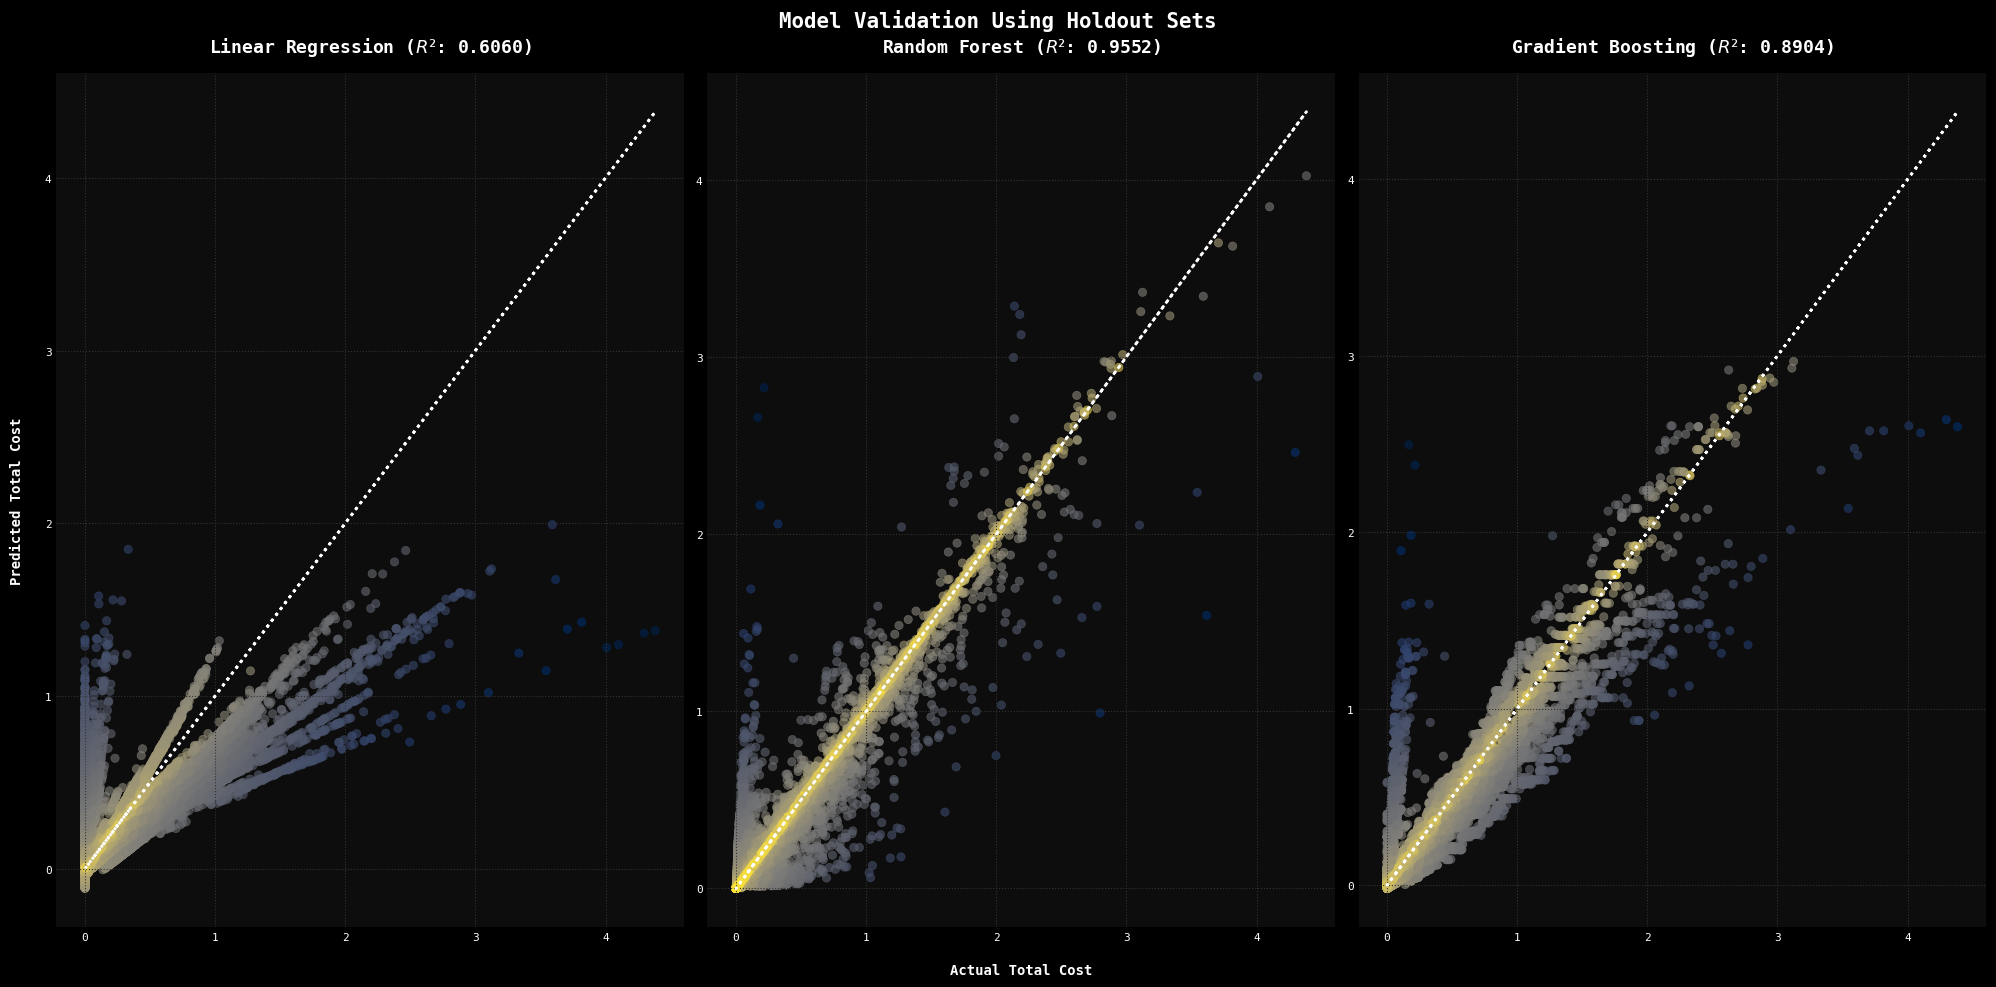

In [28]:
'''
Model Validation Using Holdout Sets

This script develops a model validation strategy using holdout sets from the `fct_electric_brew` dataset. The focus is
on forecasting energy consumption and associated costs across different periods, and the initial interest is in determining
which regressor might be best suited for a dataset of this size with this many key features, using standard parameters like
a holdout size of 30%.

Methodology:
    1. Analysis Setup: Call `setup_analysis` to prepare underlying data and initialize model pipelines
    3. Dataset Splitting: Stratify data into training and holdout sets to validate each model against unbiased data.
    4. Model Training: Fit models on training data, enabling them to uncover underlying data patterns.
    5. Model Evaluation & Visualization: Assess models on holdout set, then visualize prediction accuracy and residuals.

Mathematical Concepts:
    • Linear Regression:
        - Formula: y = β₀ + β₁x₁ + ... + βₙxₙ
        - Purpose: Predicts a dependent variable value (y) based on independent variables (x).

    • Random Forest:
        - Concept: An ensemble learning method that constructs multiple decision trees at training and outputs the mode of 
                   classes for classification or mean prediction for regression.

    • Gradient Boosting:
        - Concept: Boosting method combining weak predictive models (typically decision trees) to create a strong predictor.

    • R² (Coefficient of Determination):
        - Formula: R² = 1 - Σ(yᵢ - f(xᵢ))² / Σ(yᵢ - ȳ)²
        - Purpose: Measures the proportion of the variance for the dependent variable explained by the independent variables.

Produces:
    - Trained and validated models with performance insights.
    - Visualizations highlighting model predictions and performance.
'''

import numpy   as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics         import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from utils.runtime           import find_project_root

# Step 1: Analysis Setup
setup    = setup_analysis()
features = setup['features']
target   = setup['target']
models   = setup['models']

# Step 2: Dataset Splitting
X_train, X_holdout, y_train, y_holdout = train_test_split(features, 
                                                          target, 
                                                          test_size    = 0.3, 
                                                          random_state = 42)

# Step 3: Training and Validation
for name, pipeline in models.items():
    pipeline.fit(X_train, y_train)

# Step 4: Model Evaluation & Visualization
plt.figure(figsize = (20, 10))

for i, (name, pipeline) in enumerate(models.items()):

    y_pred    = pipeline.predict(X_holdout)
    residuals = abs(y_holdout - y_pred)
    r2        = r2_score(y_holdout, y_pred)

    # Print model performance metrics
    print(f"{name}",
          f"    MSE : {mean_squared_error(y_holdout,  y_pred):.4f}",
          f"    MAE : {mean_absolute_error(y_holdout, y_pred):.4f}",    
          f"    R²  : {r2:.4f}",
          sep='\n')

    # Model visualization
    plt.subplot(1, len(models), i + 1)
    plt.plot(y_holdout, y_holdout, color = '1', linewidth = 2, linestyle = ':') # Perfect prediction line
    sns.scatterplot(x = y_holdout, 
                    y = y_pred, 
                    c = np.power(residuals, 0.3), # More aggressive colormapping (i.e. creates more distance from 0)
                    cmap      = 'cividis_r',                  
                    alpha     = 0.6, 
                    edgecolor = None)
    
    plt.xlabel('Actual Total Cost'    if i == 1 else '')
    plt.ylabel('Predicted Total Cost' if i == 0 else '')
    plt.title(f'{name} ($R²$: {r2:.4f})')

plt.suptitle('Model Validation Using Holdout Sets', weight = 'bold', fontsize = 15)
plt.tight_layout()
plt.savefig(f"{find_project_root('./fig/analysis/01 - Model Validation Using Holdout Sets.png')}")
plt.show()